In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gmaps

In [5]:
home_df = pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')

In [6]:
home_df = home_df[home_df["City"] == 'Atlanta']
home_df = home_df.dropna(axis = 0, subset=["2015-01"])

In [7]:
home_df["PercentChange"] = 0
home_df["InitialValue"] = 0
home_df["FinalValue"] = 0
home_df["MonthCount"] = 0

for index, row in home_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = '0' + str(month)
        else:
            month_str = str(month)
        if not np.isnan(home_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = home_df.loc[index, year_str + '-' + month_str]
            home_df["InitialValue"][index] = InitialValue
            month_count+=1
        if month == 11 and year == 2019:
            home_df["FinalValue"][index] = home_df.loc[index, year_str + '-' + month_str] 
            home_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

home_df["Percent Change"] = (home_df["FinalValue"] - home_df["InitialValue"]) / home_df["InitialValue"]  * 100
cols = ["RegionName", "City", "State", "InitialValue", "FinalValue", "Percent Change"]
home_df = home_df[cols]

C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
home_df

home_df.quantile(0.3)
bottom_tier = home_df[home_df["InitialValue"] <= home_df.quantile(0.3)["InitialValue"] ]

In [9]:
home_df.to_csv('HomeValues.csv')
bottom_tier.to_csv('BottomTierHomeValues.csv')

In [10]:
bottom_tier

,RegionName,City,State,InitialValue,FinalValue,Percent Change
624,Midtown,Atlanta,GA,238817,323293,35.372691
767,Downtown,Atlanta,GA,163686,228871,39.823198
1077,Old Fourth Ward,Atlanta,GA,206508,317833,53.908323
1726,Pine Hills,Atlanta,GA,216510,296854,37.108679
2881,Lindbergh,Atlanta,GA,180296,264867,46.906753
3692,Peachtree Heights West,Atlanta,GA,256576,333718,30.065945
3845,Underwood Hills,Atlanta,GA,238436,347936,45.924273
4629,Summerhill,Atlanta,GA,235179,364488,54.983226
5271,Princeton Lakes,Atlanta,GA,178874,228343,27.655780
5610,Bolton,Atlanta,GA,211062,311104,47.399342


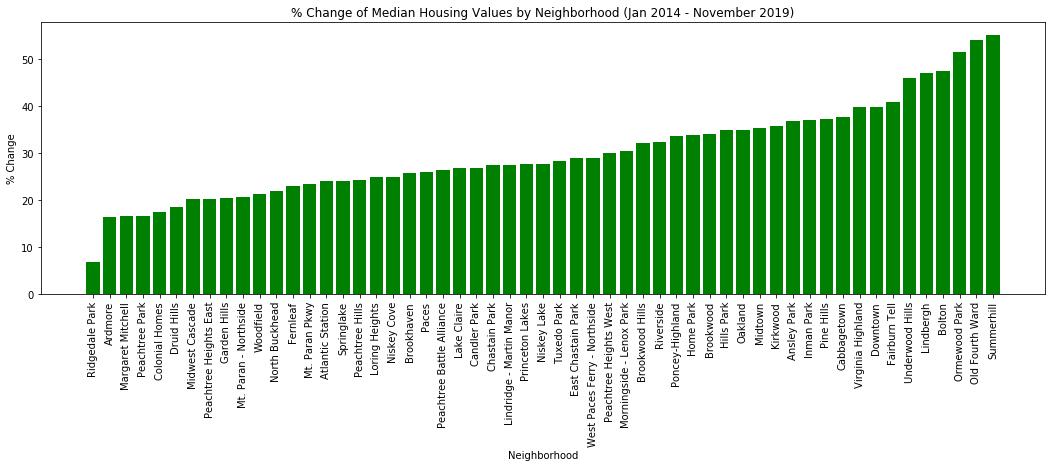

In [34]:
home_df_sorted= home_df.sort_values(by=["Percent Change"])


plt.subplots(figsize = (18,5))
plt.bar(x=home_df_sorted["RegionName"], height = home_df_sorted["Percent Change"], color='green')
plt.xticks(rotation="vertical")
plt.title("% Change of Median Housing Values by Neighborhood (Jan 2014 - November 2019)")
plt.xlabel("Neighborhood")
plt.ylabel("% Change")
plt.savefig("ChangeHousingValues.png", bbox_inches = "tight")